In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
from numpy.fft import fftshift, fft

## Display Images

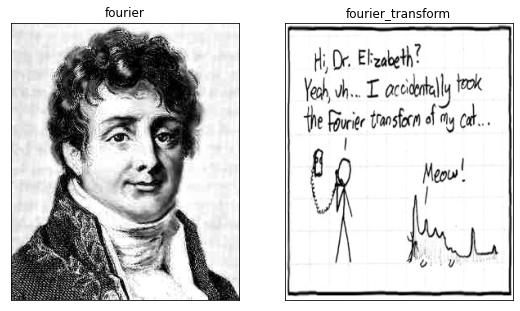

In [2]:
img1 = imread('fourier.jpeg')
img2 = imread('fourier_transform.jpg')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,9))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.imshow(img1, 'gray')
ax1.title.set_text('fourier')
ax2.imshow(img2, 'gray')
ax2.title.set_text('fourier_transform')

# DFT 
We apply fft using row-column decomposition(seperability property) on the 2D image. To shift the zero frequency component to the centre of the spectrum we also apply the fftshift function. 

In [3]:
def DFT_mag_phase (img):
    x,y = np.shape(img)
    img_row_fft = fft(img, axis=1)
    spectrum = fft(img_row_fft, axis=0)
    spectrum = fftshift(spectrum)
    mag = np.abs(spectrum)
    mag = mag/np.sqrt(x*y)
    #mag = np.log10(mag)
    phase = np.zeros_like(spectrum)
    phase[mag!=0] = spectrum[mag!=0]/mag[mag!=0]
    #phase = np.angle(spectrum)
    return mag,phase

# Visualization of DFT

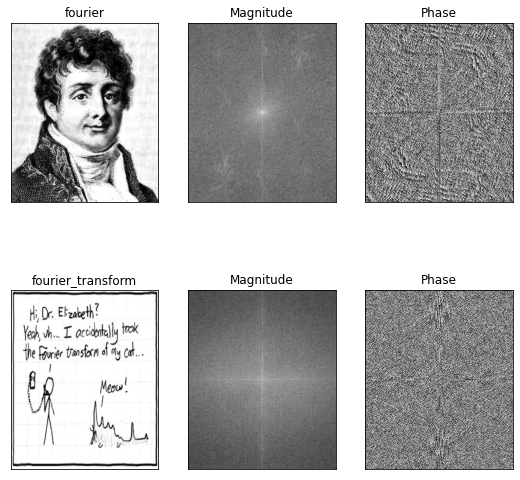

In [4]:
mag1, ph1 = DFT_mag_phase(img1)
mag2, ph2 = DFT_mag_phase(img2)
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9,9))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax3.set_xticks([])
ax3.set_yticks([])
ax4.set_xticks([])
ax4.set_yticks([])
ax5.set_xticks([])
ax5.set_yticks([])
ax6.set_xticks([])
ax6.set_yticks([])
ax1.imshow(img1, 'gray')
ax1.title.set_text('fourier')
ax2.imshow(np.log10(mag1), 'gray')
ax2.title.set_text('Magnitude')
ax3.imshow(np.angle(ph1), 'gray')
ax3.title.set_text('Phase')
ax4.imshow(img2, 'gray')
ax4.title.set_text('fourier_transform')
ax5.imshow(np.log10(mag2), 'gray')
ax5.title.set_text('Magnitude')
ax6.imshow(np.angle(ph2), 'gray')
ax6.title.set_text('Phase')

# IDFT
 Inverse DFT is performed the same way as DFT using the row-column decomposition and re-shifting the image. The magnitude and phase are combined before the transform is applied. 

In [5]:
def IDFT(mag,phase):
    x,y = np.shape(mag)
    img = mag*phase
    img = fftshift(img)
    img_row_fft = fft(img, axis=1)
    spectrum = fft(img_row_fft, axis=0)
    #spectrum = fftshift(spectrum)
    mag = np.abs(spectrum)
    #mag = np.log10(mag)
    mag = mag[::-1, ::-1]
    # normalize to ensure the transform is unitary
    return mag/np.sqrt(x*y)

## Phase Dominence
New images are created after combining the phase of image1 and magnitude of image2 and viceversa. The output images are observed to have a striking resemblance to the image of the phase.

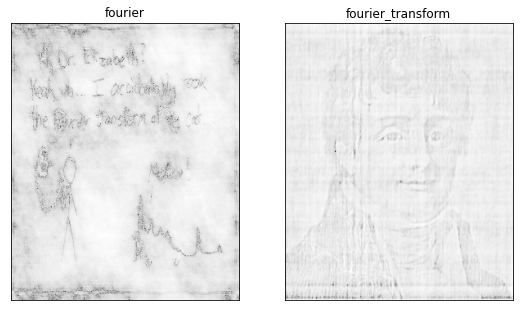

In [6]:
img3 = IDFT(mag1,ph2)
img4 = IDFT(mag2,ph1)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9,9))
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.imshow(np.log10(img3), 'gray')
ax1.title.set_text('fourier')
ax2.imshow(np.log10(img4), 'gray')
ax2.title.set_text('fourier_transform')